# Final Project: Analysis of Two Museum Datasets

Name(NetID): Jenna Kim(jkim682) | Yingying Han(yh17) | Xinyu Huang(xinyuh10) 

## Research Questions

1) What is the distribution of museum artifacts that originate from USA?  
2) How many artifacts are from countries outside USA? What are those countries?   
3) Is there a correlation between the number of artifacts with one ethnicity and the population of that ethnicity in & outside USA?  
4) What is the distribution of artifacts over time? 

## Data Collection

We used three different types of datasets:

1) Meseum datasets:   
 - Metropolitan Museum of Art (MET): https://media.githubusercontent.com/media/metmuseum/openaccess/master/MetObjects.csv
 - Indianapolis Museum of Art (IMA): https://github.com/american-art/ima/blob/master/aac-objects/aac-objects.json  
 
2) Population dataset: The World Bank (https://data.worldbank.org/indicator/sp.pop.totl)    
3) Ethnicity dataset: U.S. Census Bureau, 2014-2018 American Community Survey 5-Year Estimates (https://data.census.gov)  



## Data Preprocessing

### Merge data files within datasets

1) two museum datasets: MET & IMA  
2) one World bank dataset: population data   
3) two ethnicity datasets: ethnicity & nationality data

### Clean museum datasets with OpenRefine

OpenRefine (https://openrefine.org/): Previously Google Refine, a free open source tool for workin with messy data for cleaning and tranforming.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter 

from museum_data import *

ModuleNotFoundError: No module named 'museum_data'

#### Museum Data

In [6]:
## 1. Museum datasets
# 1-1. Metropolitan Museum of Art (MET)
met_raw_data_source = "https://media.githubusercontent.com/media/metmuseum/openaccess/master/MetObjects.csv"

# headers
useful_headers_met = ['Object ID','Title','Object Date','Object Begin Date', 'Object End Date', 'City', 'State', 'Country']
met_data_for_analysis_df = extract_need_data(met_raw_data_source,useful_headers_met)
met_data_for_analysis_df = met_data_for_analysis_df.rename(columns={'Object ID': "ObjectID", "Object Date": "ObjectDate",
                                                                    'Object Begin Date':"ObjectBeginDate",
                                                                    'Object End Date': "ObjectEndDate"})

# print(met_data_for_analysis_df.shape)
# met_data_for_analysis_df.to_csv("met_data_for_analysis.csv")

# 1-2. Indianapolis Museum of Art (IMA)
ima_data_for_analysis_df= extract_need_data_from_json("Data/Raw/Museum/ima_raw_data.json")
print(ima_data_for_analysis_df.shape)
# ima_data_for_analysis_df.to_csv("ima_data_for_analysis.csv")

# 1-3. Clean data of two files with OpenRefine tool

(11157, 8)


In [7]:
# 1-4. Concatenate two dataframes into one data frame.
file1 = "Data/Processed/met_data_for_analysis-clean.csv"
file2 = "Data/Processed/ima_data_for_analysis-clean.csv"
merged_df = merge_met_ima(file1, file2)
# merged_df.to_csv("museum.csv")

print("Shape: ", museum_df.shape)   # (485632, 15)
museum_df.tail()

file1 = "museum.csv"
file2 = "world_bank.csv"
file3 = "ethnicity.csv"
    
museum_df = pd.read_csv(file1, index_col=False, low_memory=False)
population_df = pd.read_csv(file2, index_col=False, low_memory=False)
ethnicity_df = pd.read_csv(file3, index_col=False, low_memory=False)

C:\Program Files\Python37\lib\site-packages\IPython\core\interactiveshell.py:3242: DtypeWarning: Columns (7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


NameError: name 'museum_df' is not defined

#### Population Data

In [ ]:
# 2. Extract data from World Bank Dataset
filename1 = "Data/Raw/World_Bank/World_Bank_Data.csv"
filename2 = "Data/Raw/World_Bank/World_Bank_Metadata.csv"
wb_df = read_worldbank_data(filename1, filename2)
# wb_df.to_csv('world_bank.csv', index=False, header=True)
    
# population_df.head()
print("Shape: ", wb_df.shape)  # (263, 5)
wb_df.head()

#### Ethnicity Data

In [ ]:
# 3. ethnicity data sets
file_data1 = 'Data/Raw/Ethnicity/ethnicity_asian_alone/ACSDT5Y2018.B02015_data_with_overlays_2020-05-01T221237.csv'
file_metadata1 = 'Data/Raw/Ethnicity/ethnicity_asian_alone/ACSDT5Y2018.B02015_metadata_2020-05-01T221237.csv'
join_ACS_meta_data(file_data1, file_metadata1)

file_data2 = 'Data/Raw/Ethnicity/ethnicity_first_ancestry/ACSDT5Y2013.B04001_data_with_overlays_2020-05-01T222006.csv'
file_metadata2 = 'Data/Raw/Ethnicity/ethnicity_first_ancestry/ACSDT5Y2013.B04001_metadata_2020-05-01T222006.csv'
acs_df = join_ACS_meta_data(file_data2, file_metadata2)
# acs_df.to_csv('ethnicity.csv', index=False, header=True)

print("Shape: ", ethnicity_df.shape)   # (109, 2)
ethnicity_df.head(n=10)

# Analysis

In [126]:
# Load data
file1 = "museum.csv"
file2 = "world_bank.csv"
file3 = "ethnicity.csv"
    
museum_df = pd.read_csv(file1, index_col=False, low_memory=False)
population_df = pd.read_csv(file2, index_col=False, low_memory=False)
ethnicity_df = pd.read_csv(file3, index_col=False, low_memory=False)

## Analysis 1 : Distribution of artifacts by geographical information

### Within USA (By States)

In [ ]:
museum_df_us = museum_df[museum_df['Country 1']=='United States']
museum_df_us.loc[:,'State 1'] = museum_df_us['State 1'].fillna('N/A')

In [ ]:
museum_df_us.groupby('State 1').size().sort_values(ascending=False).head(10)

We exclude the objects from Indinan, because the museum is located in Indiana

In [ ]:
museum_df_us.groupby('State 1').size().sort_values(ascending=False)[2:].head(10).plot.bar()

### Origin of Nations 

In [ ]:
def calculate_correlation(data, column1, column2):
    pearson = data[[column1, column2]].corr('pearson')
    spearman = data[[column1, column2]].corr('spearman')
    kendall = data[[column1, column2]].corr('kendall')
    
    return {'pearson': pearson, 'spearman': spearman, 'kendall': kendall}

def merge_count_with_population(count_data, population_data):
    merged_df = pd.merge(count_data, population_data, how='left', left_index=True, right_on='CountryName')
    merged_df = merged_df[['CountryName','Count', 'Population']]
    merged_df.reset_index(drop=True, inplace=True)
    for index,row in merged_df.iterrows():  # fillin the unmatched countries
        if pd.isnull(row['Population']):
            name = row['CountryName']
            if name != "N/A":
                full_name = population_df[population_df['CountryName'].str.contains(name)]
                population = population_df[population_df['CountryName'].str.contains(name)]
                merged_df.loc[index,['CountryName']] = full_name['CountryName'].iloc[0]
                merged_df.loc[index,['Population']]= population['Population'].iloc[0]
    return merged_df

In [ ]:
museum_df.loc[:,'Country 1'] = museum_df['Country 1'].fillna('N/A')
museum_df[museum_df['Country 1'] == "Côte d'Ivoire"] ="Cote d'Ivoire"
museum_group = museum_df.groupby("Country 1").size().sort_values(ascending=False).head(30).to_frame(name='Count')
museum_group

In [ ]:
museum_population = merge_count_with_population(museum_group, population_df)

Let's calculate the correlation (excluding the N/A value)

In [ ]:
museum_population = museum_population[1:]
calculate_correlation(museum_population, 'Count', 'Population')['spearman']

Maybe some relationship between the count of the objects from a certain culture and the population of that culture

In [ ]:
df = pd.merge(museum_population, ethnicity_df, how='left', left_on='CountryName', right_on='Country')
df = df[df['Country'].notnull()]
calculate_correlation(df, 'Count', 'Population_y')

No apparent relationship between the count of the objects from a certain culture and the population of that culture ethnic group in U.S

We have to say the analysis is not percise, because the large number of N/As in both Country and Ethnicity colunms.

## Analysis 2: Distribution of artifacts by time

# Basic year inspection before analysis:


## (1) How many rows in all in thie file? 

486732

## (2) How many rows do not have year value (nan)?

2390

## (3) How many unique year values are there (exclude nan value)?
2044

## (4) What is the year range?
from year 400000 BC to 2020 AD.

In [2]:
object_year_df = pd.read_csv ("museum.csv" ,usecols = ["ObjectID","ObjectBeginDate"])

In [3]:
object_year_df.shape

(485632, 2)

In [4]:
# How many cells do not have year information?
object_year_df["ObjectBeginDate"].isnull().sum()

2390

In [5]:
object_year_df = object_year_df.dropna(subset = ["ObjectBeginDate"]).astype(np.int64)

In [6]:
object_year_df.shape

(483242, 2)

In [7]:
object_year_df["ObjectBeginDate"].unique()
len(object_year_df["ObjectBeginDate"].unique())

2044

In [18]:
# Drop two rows the object year is "5000"
object_year_df = object_year_df[object_year_df["ObjectBeginDate"]!=5000]
object_year_df.head()

,ObjectID,ObjectBeginDate
0,1,1853
1,2,1901
2,3,1909
3,4,1909
4,5,1909


In [33]:
def year_zero_division(object_year)->dict:
    """
        Given a dataframe, one column of which is "ObjectBeginDate", this function divide the ObjectBeginDate values into three categories: BC (before year zero), year zero, and AD (after year zero)
        and return the number of values under each category.

    :param object_year: A dataframe, one column of which names "ObjectBeginDate"
    :return: a dictionary. The key of the dictionary is the category. The value of that key is the number of year values that under the category.
    >>> year = [0, 1, 2000, -1500]
    >>> year_df = pd.DataFrame(year,columns =['ObjectBeginDate']) 
    >>> year_category = year_zero_division(year_df)
    >>> year_category["Year Zero"]
    1
    """
    year_inspection = {}
    number_of_objects_bc = object_year[object_year["ObjectBeginDate"]<0].shape[0]
    number_of_object_year_zero = object_year[object_year["ObjectBeginDate"]==0].shape[0]
    number_of_object_ad = object_year[object_year["ObjectBeginDate"]>0].shape[0]
    year_inspection["BC"]=number_of_objects_bc
    year_inspection["Year Zero"] = number_of_object_year_zero
    year_inspection["AD"]=number_of_object_ad
    
    return year_inspection

In [35]:
year_zero_division_all = year_zero_division(object_year_df)
year_zero_division_all

{'BC': 66671, 'Year Zero': 1253, 'AD': 415316}

# Brief summary:
## 66671 objects were created before BC, year value range from year -400000 to year -1
## 415316 object were created after year Zero, year value range from year 1 to year 2020.
## Though small amount of objects were created before Year Zero, the year values have a wide range (-400000,-1).
## There are a huge amount of objects were created after Year Zero (# 415316), however, the year values cover from year 1 to year 2020 only.

In [36]:
plt.rcParams['figure.figsize']=(30,15)
plt.rcParams.update({'font.size': 30})

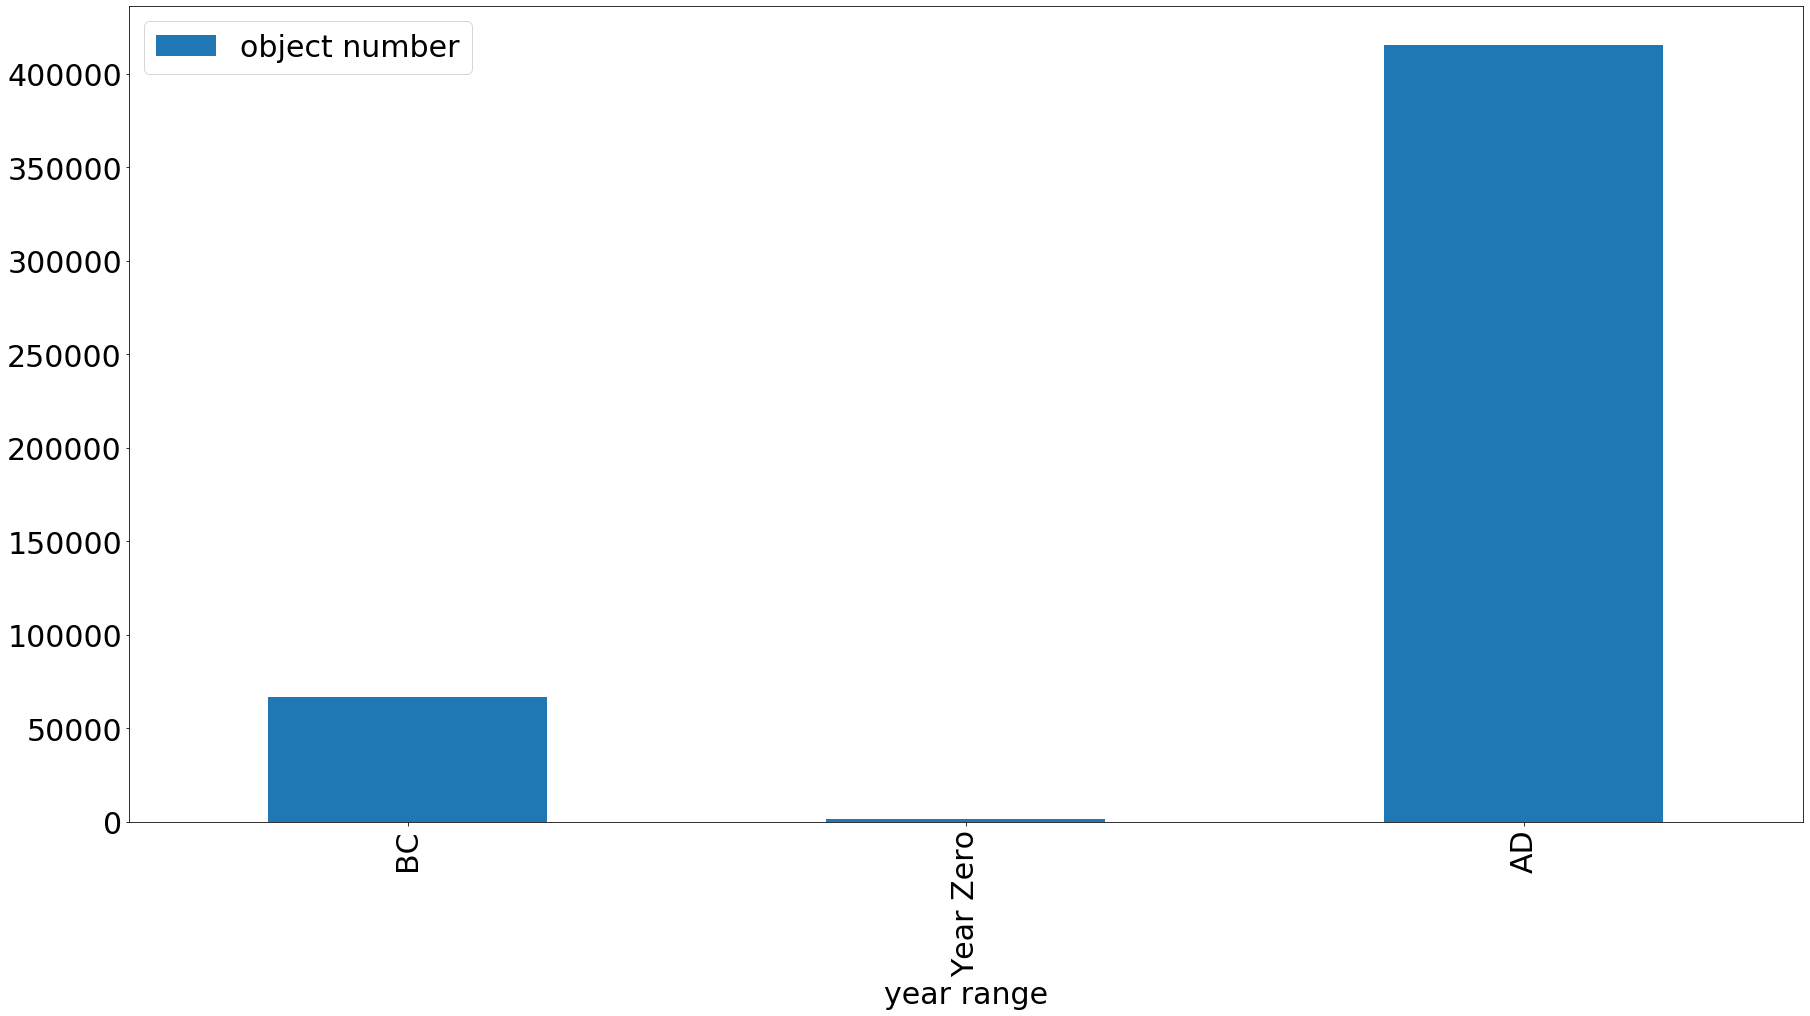

In [37]:
year_inspection_pd = pd.DataFrame.from_dict(data = year_zero_division_all, orient = "index", columns = ["object number"])
year_inspection_pd.index.name = "year range"
year_inspection_pd
year_inspection_pd.plot.bar(y="object number")

In [38]:
number_unique_year_bc = len(object_year_df[object_year_df["ObjectBeginDate"]<0]["ObjectBeginDate"].unique())
number_unique_year_ad = len(object_year_df[object_year_df["ObjectBeginDate"]>0]["ObjectBeginDate"].unique())
number_unique_year_ad

1316

In [39]:
object_year_before_zero_df=object_year_df[object_year_df["ObjectBeginDate"]<0]
# object_year_before_zero_df

object_year_before_zero_list = object_year_before_zero_df["ObjectBeginDate"].tolist()
len(object_year_before_zero_list)


66671

# This is a function categorize the year values which are smaller than 0.
## Years that are before year zero are further categorized into 5 types:
## (1) before 10,000BC
## (2) 10,000 BC - 7500BC
## (3) 7500 BC - 5000BC
## (4) 5000 BC - 2500 BC
## (5) 2500 BC - 0

In [59]:
def categorize_bc_years(bc_year:list)->dict:
    """
    Give a list of year values, all of which are smaller than 0. This function divides the year values into 5 categories.The categories are:
    (1) before 10,000BC; (2) 10,000 BC - 7500BC; (3) 7500 BC - 5000BC; (4) 5000 BC - 2500 BC; (5) 2500 BC - 0. The function will calculate the number of values
    in each category.
    :param bc_year: year values in a list, and all the year values are smaller than 0.
    :return: a dictionary, containing 5 categories. The key of this dictionary is each category and the value of each key is the year values that fall under this category.
    >>> year = [-20000,-8500,-5600,-3000,-1500]
    >>> bc = categorize_bc_years(year)
    >>> bc['before 10000BC']
    1
    """
    bc_categories_dic = {"1": (-400000,-10000),
        "2": (-10000,-7500),
        "3": (-7500,-5000),
        "4": (-5000,-2500),
        "5": (-2500,0)}
    a=[]# -400000,-10000
    b=[]# -10000,750
    c=[]# -7500,-5000
    d=[]# -5000,-2500
    e=[]# -2500,0
    bc_category_distribution = {}
    
    for object_year in bc_year:
        if object_year in range (bc_categories_dic["1"][0],bc_categories_dic["1"][1]):
            a.append(object_year)
            bc_category_distribution["before 10000BC"] = len(a)
            
        elif object_year in range(bc_categories_dic["2"][0],bc_categories_dic["2"][1]):
            b.append(object_year)
            bc_category_distribution["10000BC to 7500BC"] = len(b)
            
        elif object_year in range(bc_categories_dic["3"][0],bc_categories_dic["3"][1]):
            c.append(object_year)
            bc_category_distribution["7500BC to 5000BC"] = len(c)
            
        elif object_year in range(bc_categories_dic["4"][0],bc_categories_dic["4"][1]):
            d.append(object_year)
            bc_category_distribution["5000BC to 2500BC"] = len(d)
        
        else:
            e.append(object_year)
            bc_category_distribution["2500BC to Year 0"] = len(e)

    return bc_category_distribution

In [65]:
# Source: https://stackoverflow.com/questions/52139110/how-to-change-the-order-of-keys-in-a-python-3-5-dictionary-using-another-list-a
# I convert the code from the source website to a function
def change_key_order (key_order:list,year:dict)->dict:
    """
    Given a dictionary and a list. The list includes the dictionary key values in wanted order.
    This function returns a new dictionary, the keys of this dictionary follow the order as in the given list.
    :param key_order: a list of key_values
    :param year: a dictionary
    :return: a new dictionary, the keys of this dictionary follow the order as in the given list.
    >>> dictionary_year = {"0-500":3,"1000-1500":24,"500-1000": 90}

    >>> key_in_order = ["0-500","500-1000","1000-1500"]

    >>> correct_dictionary = change_key_order (key_in_order,dictionary_year)
    
    >>> correct_dictionary
    {'0-500': 3, '500-1000': 90, '1000-1500': 24}

    """
    year_sorted = {k : year[k] for k in key_order}
    return year_sorted

In [44]:
bc_year_dictionary = categorize_bc_years(object_year_before_zero_list)
bc_year_dictionary

{'2500BC to Year 0': 61760,
 'before 10000BC': 38,
 '5000BC to 2500BC': 3144,
 '10000BC to 7500BC': 11,
 '7500BC to 5000BC': 1718}

In [88]:
key_order =["before 10000BC","10000BC to 7500BC","7500BC to 5000BC","5000BC to 2500BC","2500BC to Year 0"]
bc_year_dictionary_sorted= change_key_order (key_order,bc_year_dictionary)
bc_year_dictionary_sorted

{'before 10000BC': 38,
 '10000BC to 7500BC': 11,
 '7500BC to 5000BC': 1718,
 '5000BC to 2500BC': 3144,
 '2500BC to Year 0': 61760}

In [89]:
distribution_df = pd.DataFrame.from_dict(bc_year_dictionary_sorted,
                                              orient='index',
                                              columns = ["object number"])

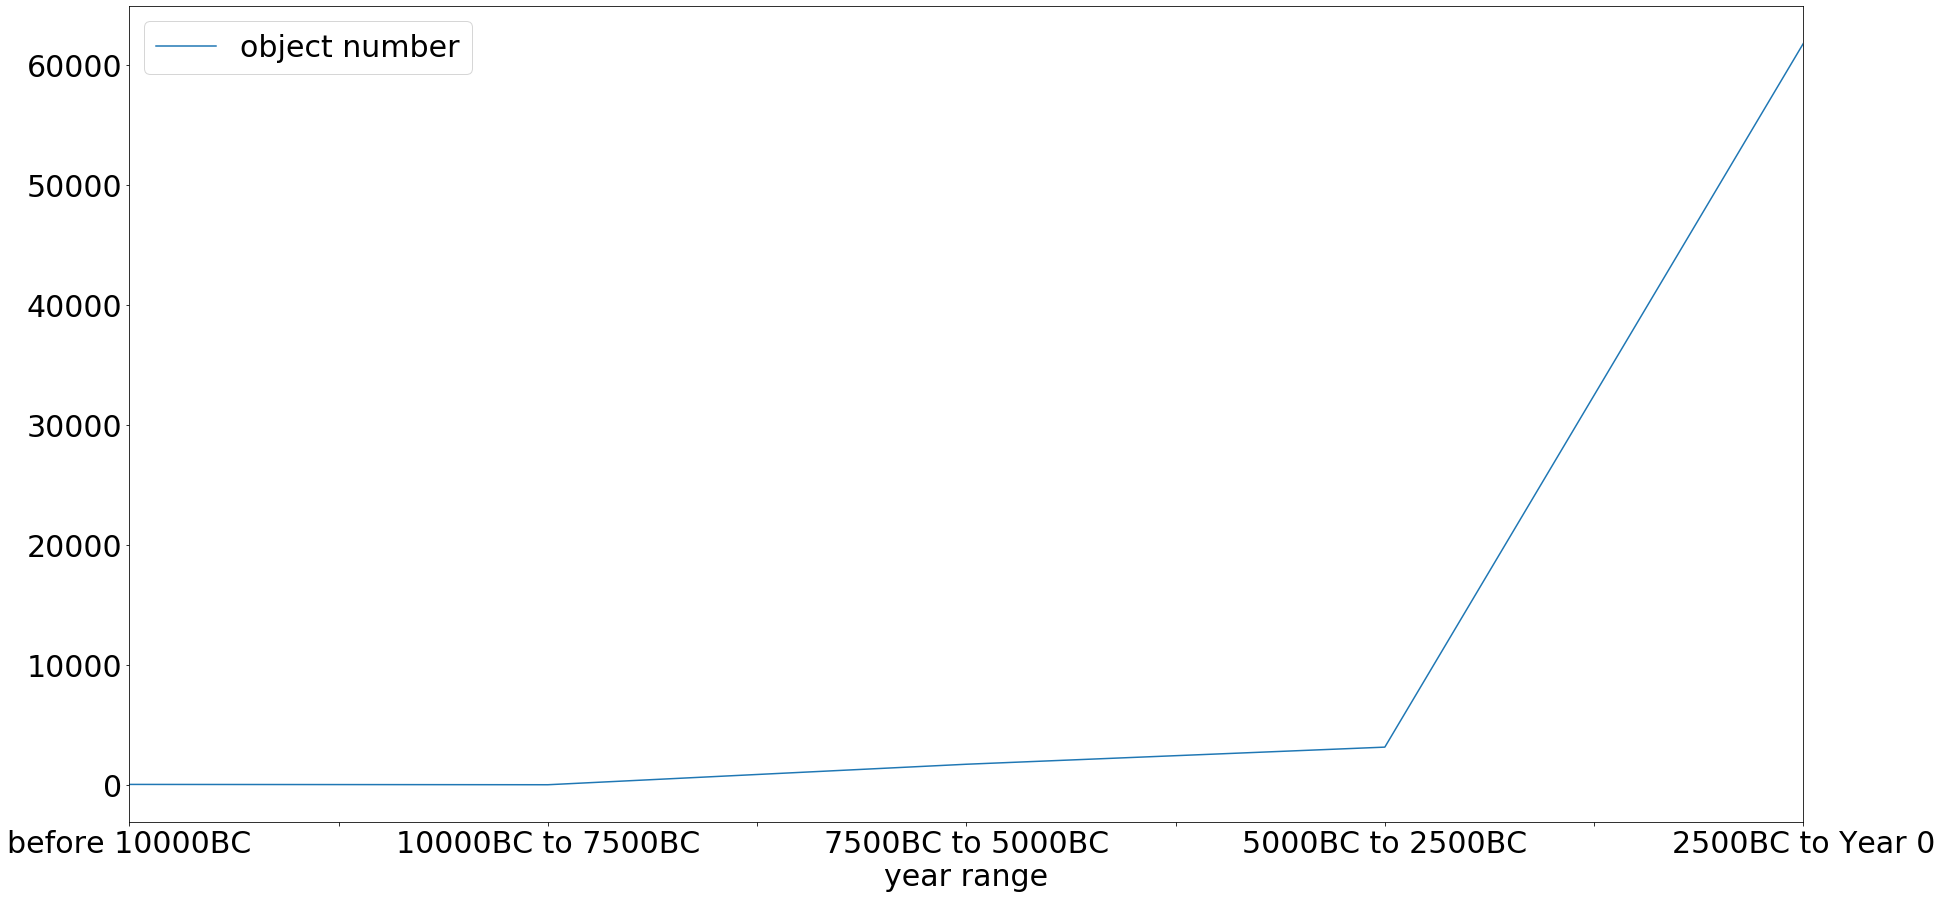

In [90]:
distribution_df.index.name = "year range"

distribution_df.plot(y="object number")

In [ ]:
distribution_df.plot.bar(y="object number")

# From the above two graphs, we can see that for those objects which were created before year zero as well as collected by museums, most of them were created between 2500 BC and year Zero. 

In [91]:
object_year_after_zero_df=object_year_df[object_year_df["ObjectBeginDate"]>0]
# object_year_after_zero_df

# This is a function convert year value to century value.

In [92]:
def year_to_century(year:list) ->list:
    """
    Given a list of year values, this function transfer the year values to century values.
    
    :param year: a list of year values
    :return: a list of century values
    >>> year = [1,201,333,879,2011]
    >>> century_list = year_to_century(year)
    >>> century_list[3]
    9
    """
    century = []
    for year_value in year:
        if year_value > 0:
            century_value = int(year_value/100)+1
            century.append(century_value)
        elif year_value == 0:
            century_value = 0
            century.append(century_value)
        else:
            century_value = int(year_value/100)-1
            century.append(century_value)
    return century

In [93]:
object_year_after_zero_list = object_year_after_zero_df["ObjectBeginDate"].tolist()

In [94]:
len(object_year_after_zero_list)

415316

In [95]:
object_century_after_zero_list = year_to_century(object_year_after_zero_list)
# object_century_after_zero_list

In [96]:
#Source: https://stackoverflow.com/questions/20665232/how-to-plot-the-number-of-times-each-element-is-in-a-list
counts_after_zero = Counter(object_century_after_zero_list)

In [97]:
counts_after_zero

Counter({19: 133244,
         20: 113146,
         17: 34489,
         18: 61983,
         16: 29655,
         14: 3758,
         15: 7437,
         12: 3011,
         1: 2829,
         3: 2082,
         7: 2047,
         4: 2168,
         6: 2046,
         5: 1250,
         13: 2737,
         8: 2246,
         11: 1351,
         9: 3565,
         2: 1518,
         10: 2050,
         21: 2704})

In [98]:
import collections
# Source: https://stackoverflow.com/questions/9001509/how-can-i-sort-a-dictionary-by-key
counts_after_zero_sorted = collections.OrderedDict(sorted(counts_after_zero.items()))
counts_after_zero_sorted

OrderedDict([(1, 2829),
             (2, 1518),
             (3, 2082),
             (4, 2168),
             (5, 1250),
             (6, 2046),
             (7, 2047),
             (8, 2246),
             (9, 3565),
             (10, 2050),
             (11, 1351),
             (12, 3011),
             (13, 2737),
             (14, 3758),
             (15, 7437),
             (16, 29655),
             (17, 34489),
             (18, 61983),
             (19, 133244),
             (20, 113146),
             (21, 2704)])

In [99]:
ad_century_distribution_df = pd.DataFrame.from_dict(counts_after_zero_sorted,orient='index',
                                              columns = ["object number"])
ad_century_distribution_df.index.name = "century"

In [100]:
century_percent_list = []
for object_number_by_century in counts_after_zero_sorted.values():
    
    object_percent = object_number_by_century/415316*100
    
    century_percent_list.append(object_percent)
print(century_percent_list)

[0.6811680744300724, 0.3655048204258926, 0.5013050303865009, 0.5220121546003524, 0.30097564264319215, 0.4926369318783769, 0.4928777123924915, 0.5407930347012877, 0.8583825328183841, 0.4936000539348352, 0.3252944745687621, 0.7249901279989213, 0.6590162671315336, 0.904853172042493, 1.7906846834699361, 7.140346146067091, 8.304279151296843, 14.924298606362385, 32.082558822679594, 27.2433520500053, 0.6510705101657533]


In [101]:
ad_century_distribution_df["object_percent"]=century_percent_list

In [102]:
ad_century_distribution_df

,object number,object_percent
century,,
1,2829,0.681168
2,1518,0.365505
3,2082,0.501305
4,2168,0.522012
5,1250,0.300976
6,2046,0.492637
7,2047,0.492878
8,2246,0.540793
9,3565,0.858383


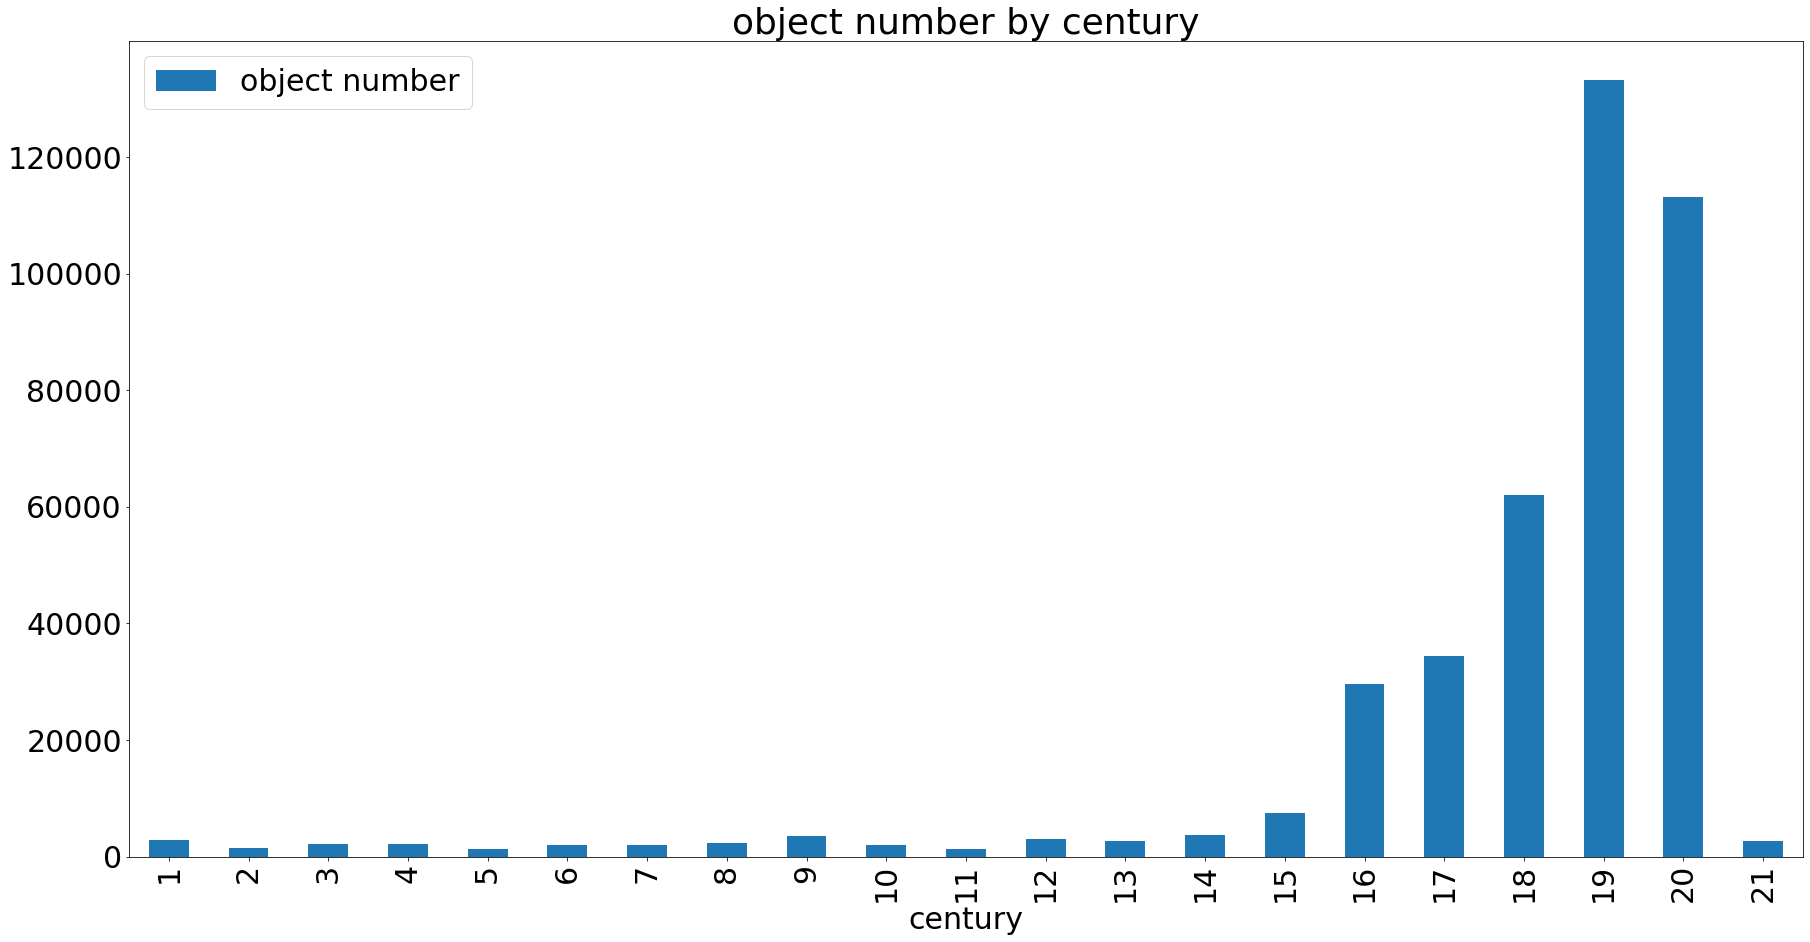

In [103]:
ad_century_distribution_df.plot.bar(y="object number",title = "object number by century")

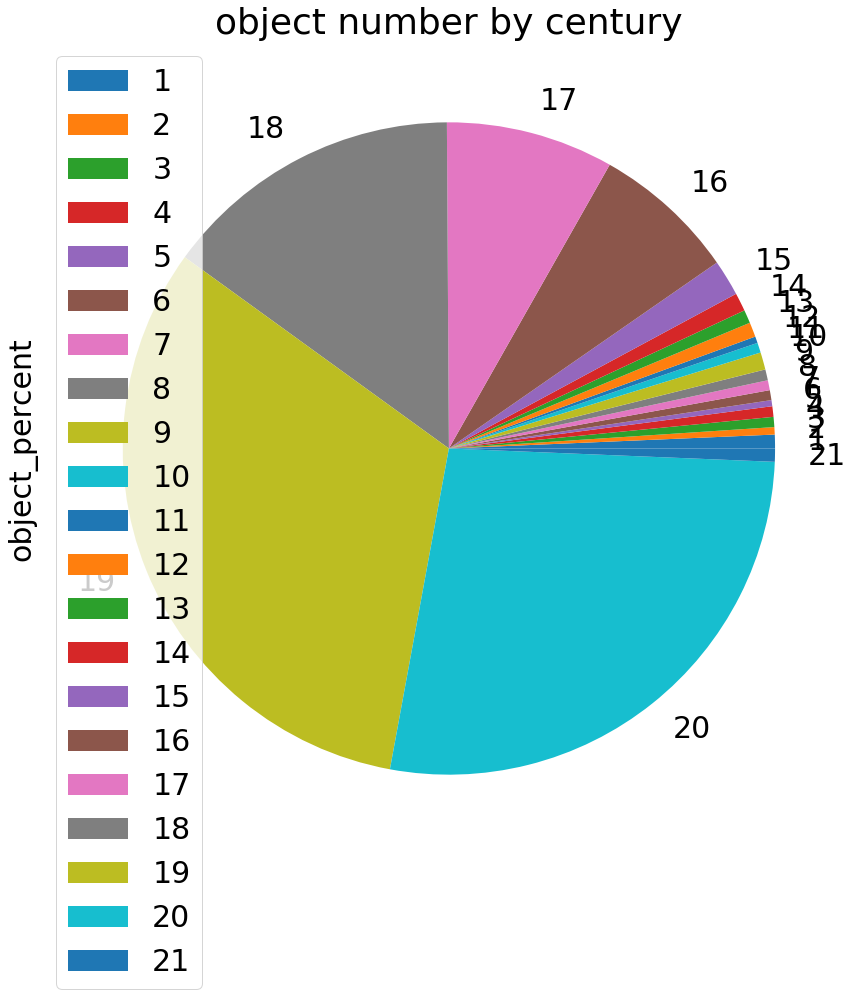

In [104]:
ad_century_distribution_df.plot.pie(y="object_percent",title = "object number by century")

# How many objects are created after (including) 19th century?¶ 

249094

In [105]:
object_year_df.head()
object_after_19century_df = object_year_df [object_year_df["ObjectBeginDate"] > 1799]
object_after_19century_df.shape

(249094, 2)

# This is a function which convert the year to five categories:
1800-1850

1850-1900

1900-1950

1950-2000

2000-2050

In [106]:
def categorize_year_half_century (ad_year:list)->dict:
    """
    Given a list of years values which are between 1800 and 2050, this function divides the year
    values into 5 types. The five categories are: 
    (1) 1800 to 1850,
    (2) 1850 to 1900,
    (3) 1900 to 1950,
    (4) 1950 to 2000,
    (5) 2000 to 2050,
    The function returns a dictionary. The key of the dictionary is the year range. 
    The value of that key is the number of year values that fall under the year range in the key.
    :param ad_year: a list of year values that are between 1800 and 2050.
    :return: A dictionary. The key of the dictionary is the year range. 
    The value of that key is the year values that fall under the year range in the key.
    >>> year = [1911,1904,2020,2001,1921,1975,1801,1830]
    >>> category = categorize_year_half_century(year)
    >>> category["2000-2050"]
    2
    """
    bc_categories_dic = {"1": (1800,1850),
        "2": (1850,1900),
        "3": (1900,1950),
        "4": (1950,2000),
        "5": (2000,2050)}
    a=[]
    b=[]
    c=[]
    d=[]
    e=[]
    
    half_century_category_distribution = {}
    
    for object_year in ad_year:
        if object_year in range (bc_categories_dic["1"][0],bc_categories_dic["1"][1]):
            a.append(object_year)
            half_century_category_distribution["1800-1850"] = len(a)
            
        elif object_year in range(bc_categories_dic["2"][0],bc_categories_dic["2"][1]):
            b.append(object_year)
            half_century_category_distribution["1850-1900"] = len(b)
            
        elif object_year in range(bc_categories_dic["3"][0],bc_categories_dic["3"][1]):
            c.append(object_year)
            half_century_category_distribution["1900-1950"] = len(c)
            
        elif object_year in range(bc_categories_dic["4"][0],bc_categories_dic["4"][1]):
            d.append(object_year)
            half_century_category_distribution["1950-2000"] = len(d)
        
        else:
            e.append(object_year)
            half_century_category_distribution["2000-2050"] = len(e)

    return half_century_category_distribution

In [107]:
import doctest
doctest.testmod(verbose=True)

Trying:
    year = [-20000,-8500,-5600,-3000,-1500]
Expecting nothing
ok
Trying:
    bc = categorize_bc_years(year)
Expecting nothing
ok
Trying:
    bc['before 10000BC']
Expecting:
    1
ok
Trying:
    year = [1911,1904,2020,2001,1921,1975,1801,1830]
Expecting nothing
ok
Trying:
    category = categorize_year_half_century(year)
Expecting nothing
ok
Trying:
    category["2000-2050"]
Expecting:
    2
ok
Trying:
    dictionary_year = {"0-500":3,"1000-1500":24,"500-1000": 90}
Expecting nothing
ok
Trying:
    key_in_order = ["0-500","500-1000","1000-1500"]
Expecting nothing
ok
Trying:
    correct_dictionary = change_key_order (key_in_order,dictionary_year)
Expecting nothing
ok
Trying:
    correct_dictionary
Expecting:
    {'0-500': 3, '500-1000': 90, '1000-1500': 24}
ok
Trying:
    year = [1,201,333,879,2011]
Expecting nothing
ok
Trying:
    century_list = year_to_century(year)
Expecting nothing
ok
Trying:
    century_list[3]
Expecting:
    9
ok
Trying:
    year = [0, 1, 2000, -1500]
Expect

TestResults(failed=0, attempted=17)

In [108]:
object_after_19century_list = object_after_19century_df["ObjectBeginDate"].tolist()
len(object_after_19century_list)

249094

In [109]:
categorize_year_half_century_dic = categorize_year_half_century (object_after_19century_list)

In [110]:
order = ["1800-1850","1850-1900","1900-1950","1950-2000","2000-2050"]
categorize_year_half_century_dic = change_key_order (order,categorize_year_half_century_dic)

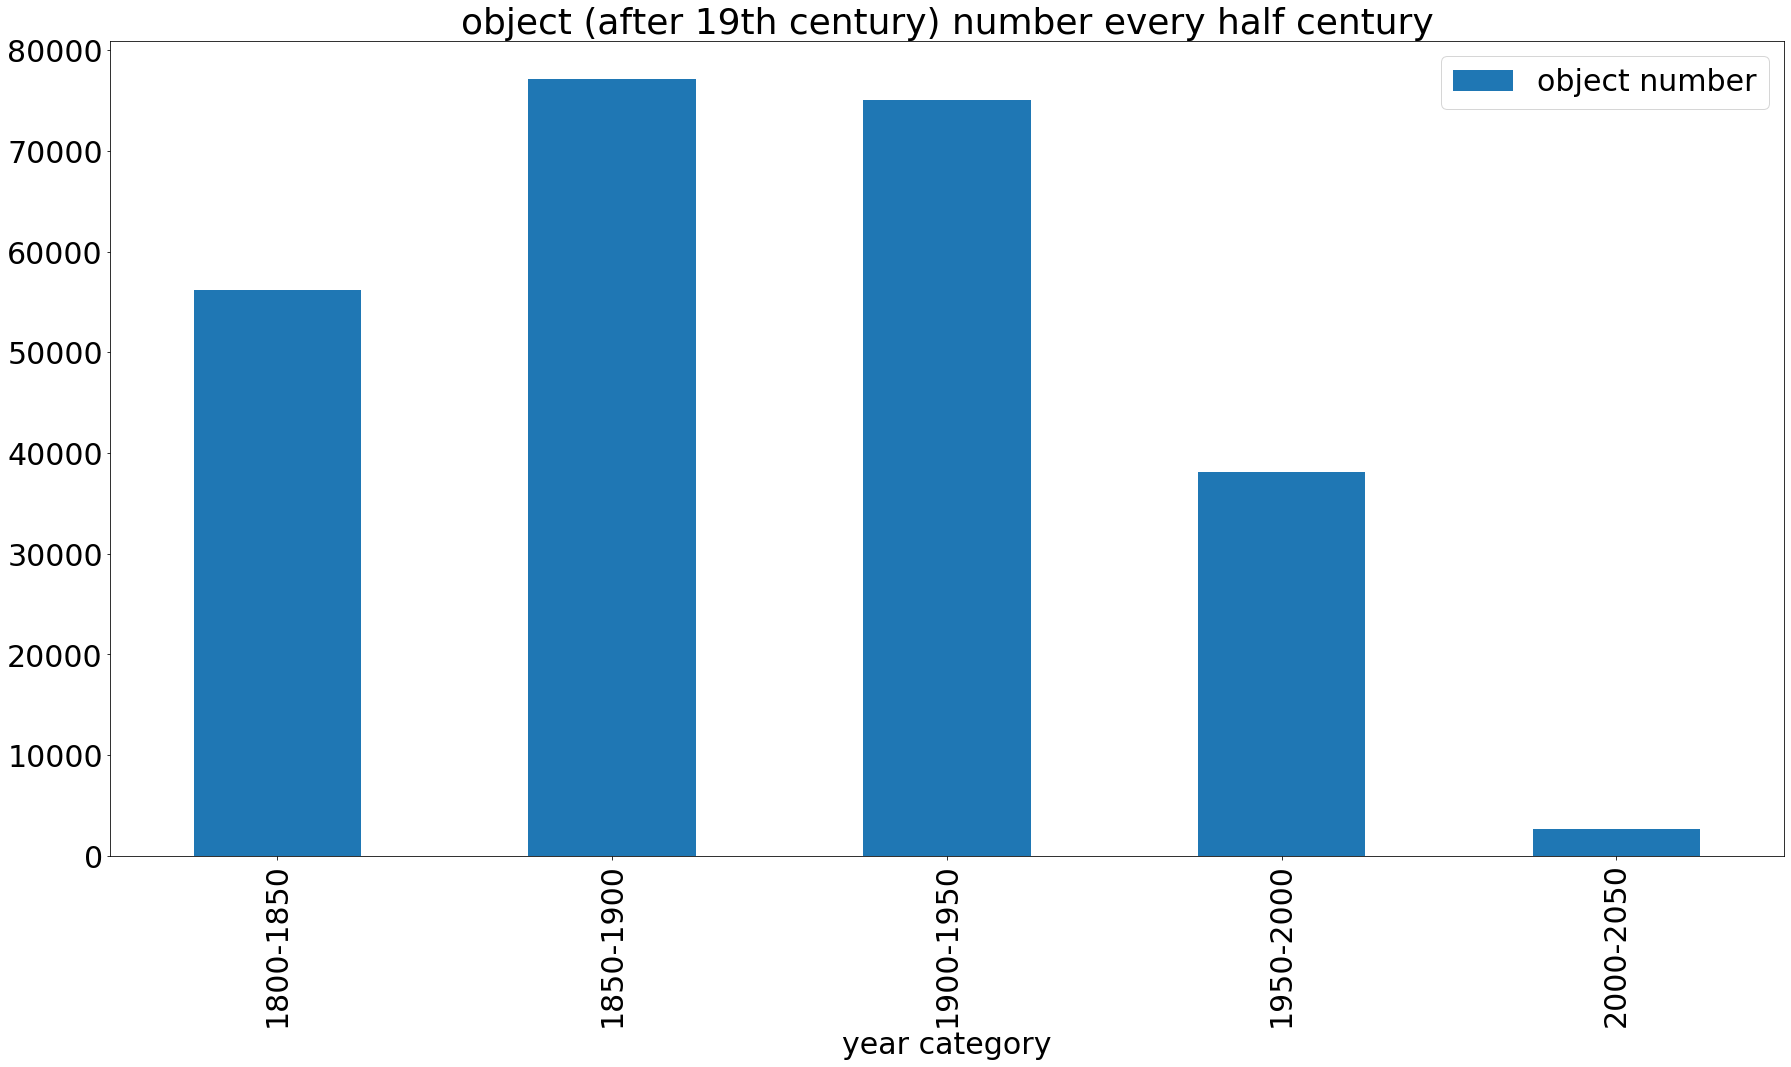

In [112]:
categorize_year_half_century_df.plot.bar(y="object number",title = "object (after 19th century) number every half century")

In [119]:
def categorize_year_quarter_century (ad_year:list)->dict:
    """
    Given a list of year values,the values of which should be between 1800 to 2020, this function 
    divide the year values into 9 categories. The categories are:
    1800 to 1825,1825 to 1850,1850 to 1875,1875 to 1900,1900 to 1925, 1925 to 1950, 1950 to 1975, 1975 to 2000,2000 to 2020.
    
    :param ad_year: a list of year values,the values of which should be between 1800 to 2020
    :return: a dictionary with nine key value pairs. The key would be the year range. The value would be the number of year values that fall under that year range.
    >>> year = [1911,1904,2020,2001,1921,1975,1801]
    >>> quarter_year = categorize_year_quarter_century(year)
    >>> quarter_year["1800-1825"]
    1
    """
    bc_categories_dic = {"1": (1800,1825),
        "2": (1825,1850),
        "3": (1850,1875),
        "4": (1875,1900),
        "5": (1900,1925),
        "6": (1925,1950),
        "7": (1950,1975),
        "8": (1975,2000),
        "9": (2000,2020)                 
                        }
    a=[]
    b=[]
    c=[]
    d=[]
    e=[]
    f=[]
    g=[]
    h=[]
    i=[]
    
    category_distribution = {}
    
    for object_year in ad_year:
        if object_year in range (bc_categories_dic["1"][0],bc_categories_dic["1"][1]):
            a.append(object_year)
            category_distribution["1800-1825"] = len(a)
            
        elif object_year in range(bc_categories_dic["2"][0],bc_categories_dic["2"][1]):
            b.append(object_year)
            category_distribution["1825-1850"] = len(b)
            
        elif object_year in range(bc_categories_dic["3"][0],bc_categories_dic["3"][1]):
            c.append(object_year)
            category_distribution["1850-1875"] = len(c)
            
        elif object_year in range(bc_categories_dic["4"][0],bc_categories_dic["4"][1]):
            d.append(object_year)
            category_distribution["1875-1900"] = len(d)
        
        elif object_year in range(bc_categories_dic["5"][0],bc_categories_dic["5"][1]):
            e.append(object_year)
            category_distribution["1900-1925"] = len(e)
            
        elif object_year in range(bc_categories_dic["6"][0],bc_categories_dic["6"][1]):
            f.append(object_year)
            category_distribution["1925-1950"] = len(f)
            
        elif object_year in range(bc_categories_dic["7"][0],bc_categories_dic["7"][1]):
            g.append(object_year)
            category_distribution["1950-1975"] = len(f)
            
        elif object_year in range(bc_categories_dic["8"][0],bc_categories_dic["8"][1]):
            h.append(object_year)
            category_distribution["1975-2000"] = len(h)
        else:
            i.append(object_year)
            category_distribution["2000-2020"] = len(i)
    return category_distribution

In [121]:
categorize_year_quarter_century_dic = categorize_year_quarter_century (object_after_19century_list)
categorize_year_quarter_century_dic

{'1850-1875': 31444,
 '1900-1925': 41839,
 '1875-1900': 45653,
 '1800-1825': 37391,
 '1825-1850': 18756,
 '1925-1950': 33231,
 '1975-2000': 12408,
 '1950-1975': 33225,
 '2000-2020': 2704}

In [122]:
key_order_qurter = ["1800-1825","1825-1850","1850-1875","1875-1900","1900-1925","1925-1950","1950-1975","1975-2000","2000-2020"]

In [123]:
categorize_year_half_century_dic = change_key_order (key_order_qurter,categorize_year_quarter_century_dic)

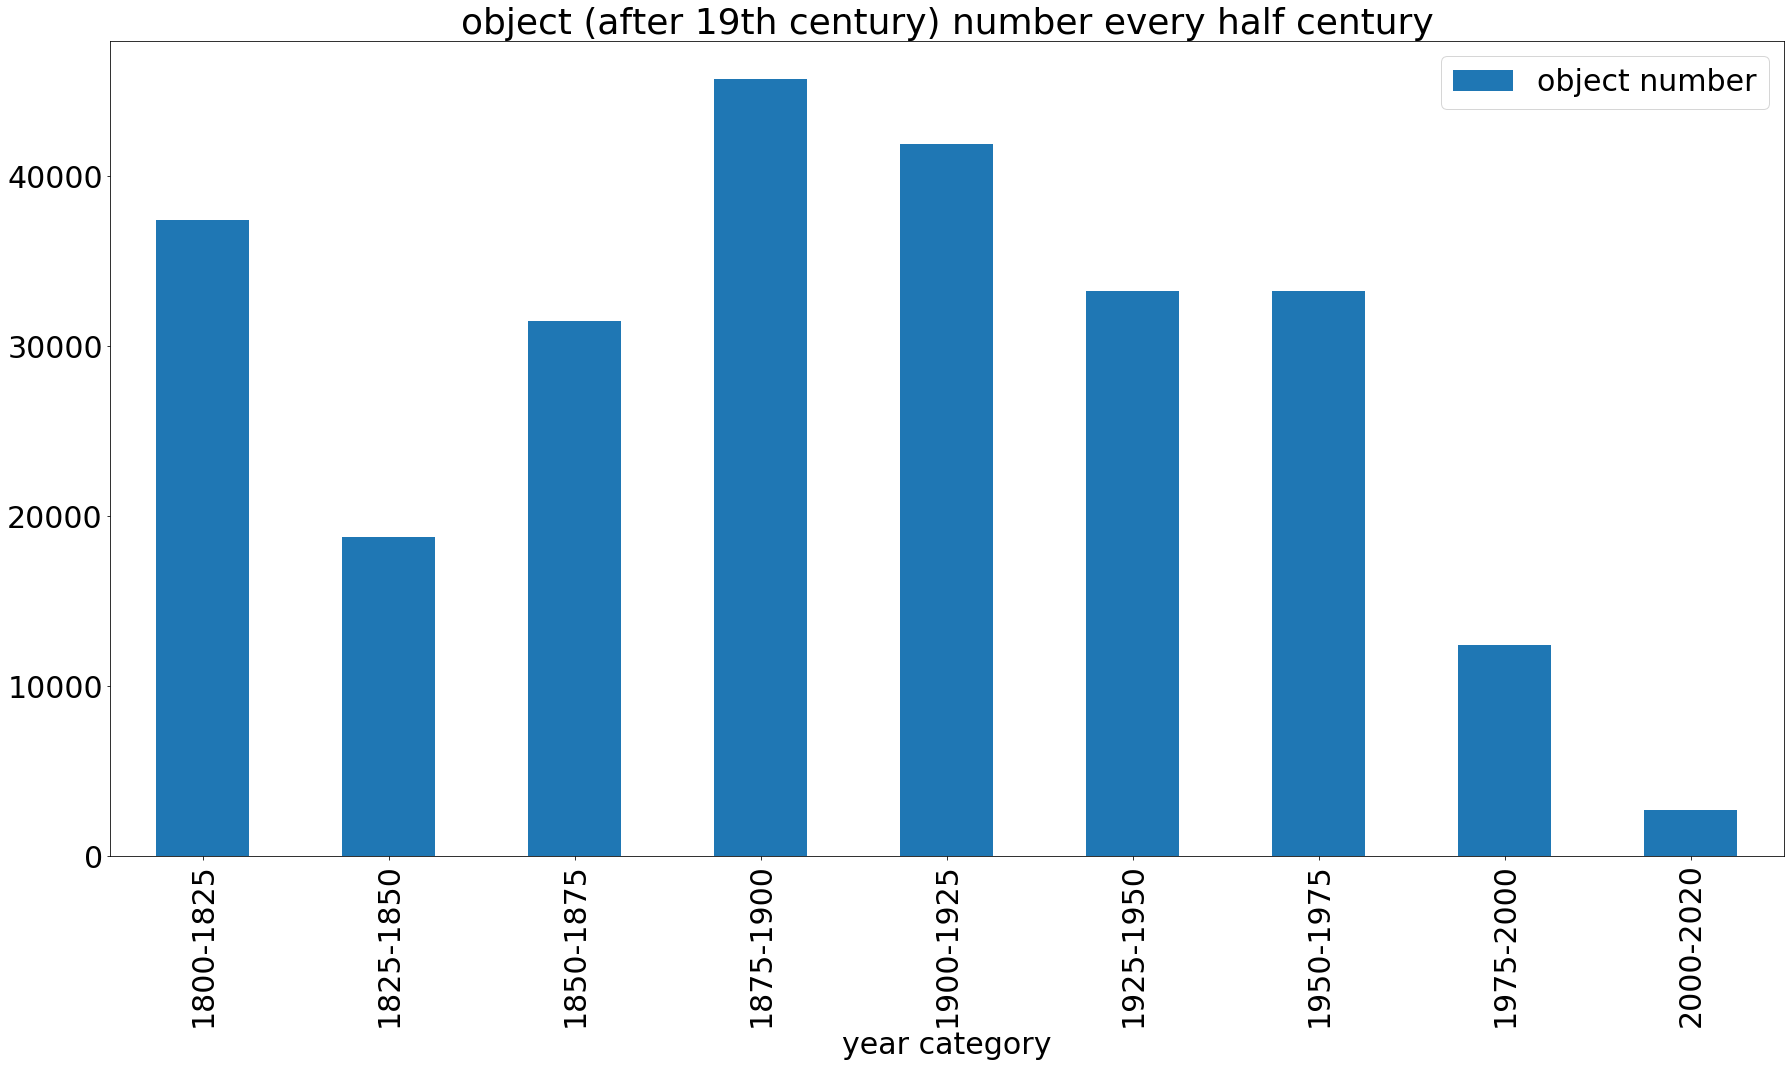

In [124]:
categorize_year_half_century_df = pd.DataFrame.from_dict(categorize_year_half_century_dic,orient="index",columns=["object number"])
categorize_year_half_century_df.index.name="year category"
categorize_year_half_century_df.plot.bar(y="object number",title = "object (after 19th century) number every half century")

In [127]:
museum_df.head()
museum_year_country = museum_df[["ObjectBeginDate","Country 1"]]
museum_year_country.shape

(485632, 2)

# Since there are many objects from Egypt. We did a year analysis on the created year values of objected originated from Egypt.¶

In [128]:
museum_year_country_drop_nan = museum_year_country.dropna(how = "any", subset=["ObjectBeginDate","Country 1"])
museum_year_country_drop_nan.head()

,ObjectBeginDate,Country 1
14,1665.0,Mexico
15,1800.0,Mexico
16,1867.0,Mexico
17,1860.0,Mexico
18,1859.0,Mexico


In [129]:
museum_egypt_year =museum_year_country_drop_nan.loc[museum_year_country['Country 1'] == "Egypt"]
museum_egypt_year.shape

(33324, 2)

In [130]:
museum_egypt_year = museum_egypt_year.astype({"ObjectBeginDate": np.int64})
museum_egypt_year.head()

,ObjectBeginDate,Country 1
70317,1800,Egypt
70319,1900,Egypt
70320,1800,Egypt
70321,1800,Egypt
70322,1800,Egypt


In [131]:
museum_egypt_year["ObjectBeginDate"]

70317     1800
70319     1900
70320     1800
70321     1800
70322     1800
          ... 
470672   -1353
471258    -712
471259    -712
474463   -1550
474464   -1550
Name: ObjectBeginDate, Length: 33324, dtype: int64

In [132]:
egypt_year_zero_division = year_zero_division(museum_egypt_year)
egypt_year_zero_division

{'BC': 27310, 'Year Zero': 44, 'AD': 5970}

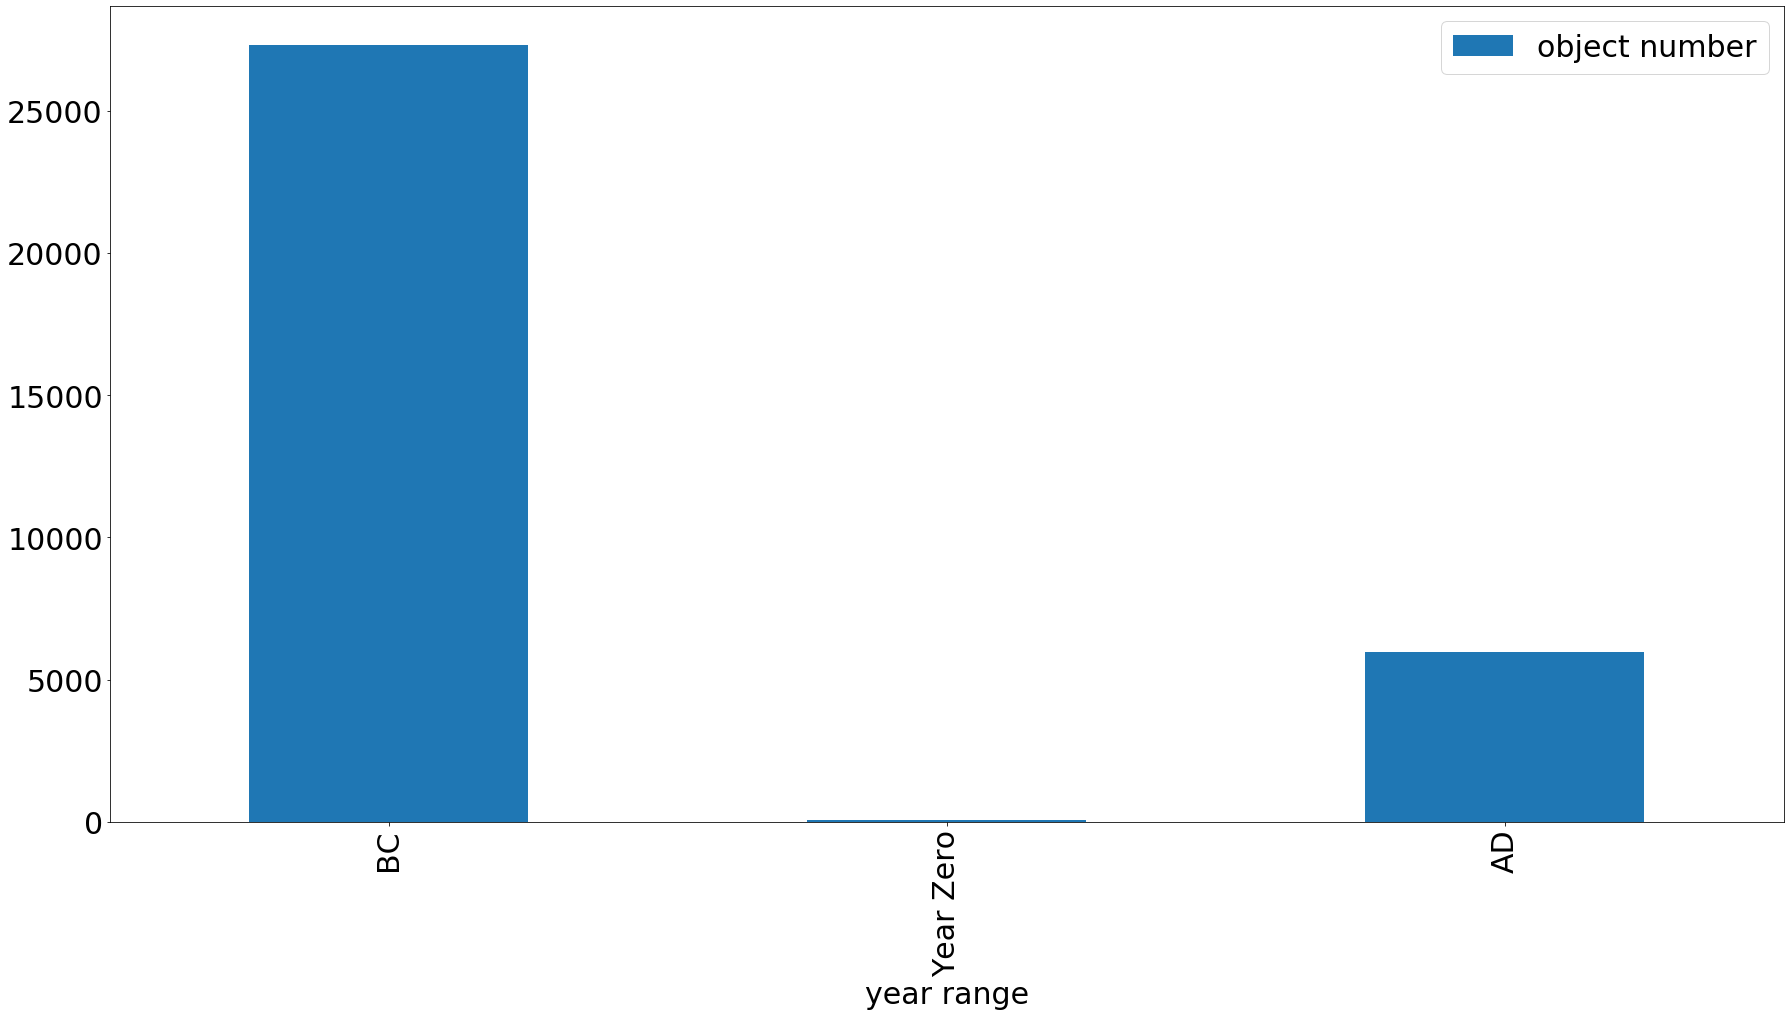

In [133]:
egypt_year_inspection_pd = pd.DataFrame.from_dict(egypt_year_zero_division,orient = "index", columns = ["object number"])
egypt_year_inspection_pd.index.name = "year range"
egypt_year_inspection_pd.plot.bar(y="object number")

In [134]:
egypt = []
for number in egypt_year_zero_division.values():
    
    object_percent = number/33324*100
    
    egypt.append(object_percent)
print(egypt)

[81.95294682511103, 0.13203697035169848, 17.91501620453727]


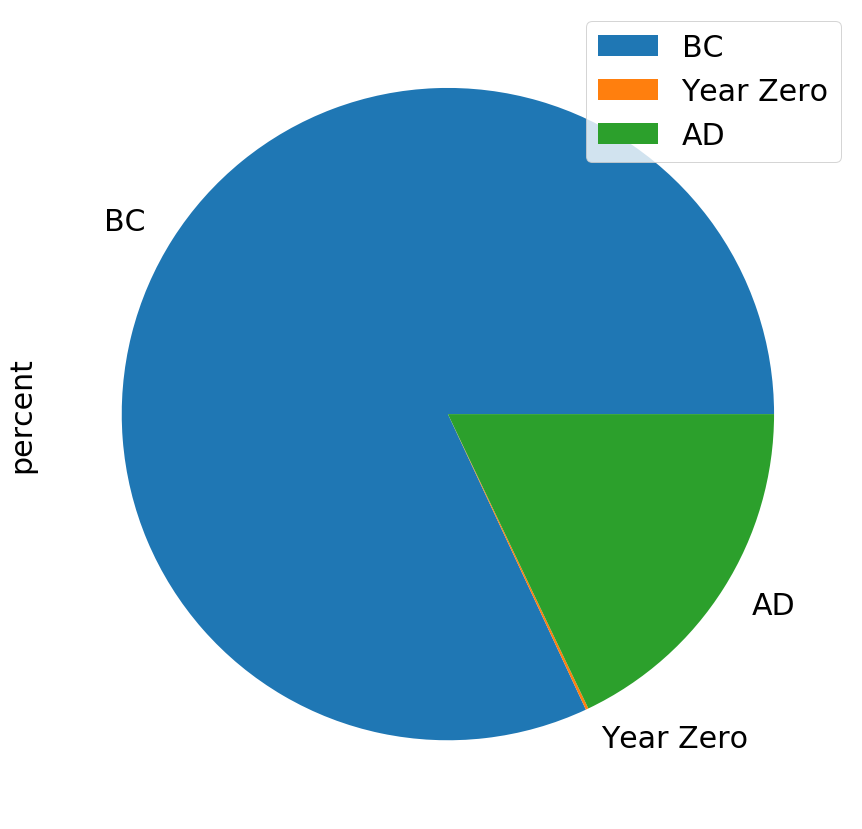

In [135]:
egypt_year_inspection_pd["percent"] = egypt
egypt_year_inspection_pd.plot.pie(y="percent")

In [136]:
museum_china_year = museum_year_country.loc[museum_year_country['Country 1'] == "China"]
museum_china_year_dropnan = museum_china_year.dropna(how = "any",subset = ["ObjectBeginDate","Country 1"])
museum_china_year_dropnan= museum_china_year_dropnan.astype({"ObjectBeginDate": np.int64})
museum_china_year_dropnan.shape

(948, 2)

In [137]:
china_year_zero_division = year_zero_division(museum_china_year_dropnan)
china_year_zero_division

{'BC': 1, 'Year Zero': 0, 'AD': 947}

In [138]:
china_year_inspection_pd = pd.DataFrame.from_dict(china_year_zero_division,orient = "index", columns = ["object number"])
china_year_inspection_pd.index.name = "year range"

In [139]:
china = []
for year in china_year_zero_division.values():
    
    object_percent = year/948*100
    
    china.append(object_percent)
print(china)

[0.10548523206751054, 0.0, 99.89451476793249]


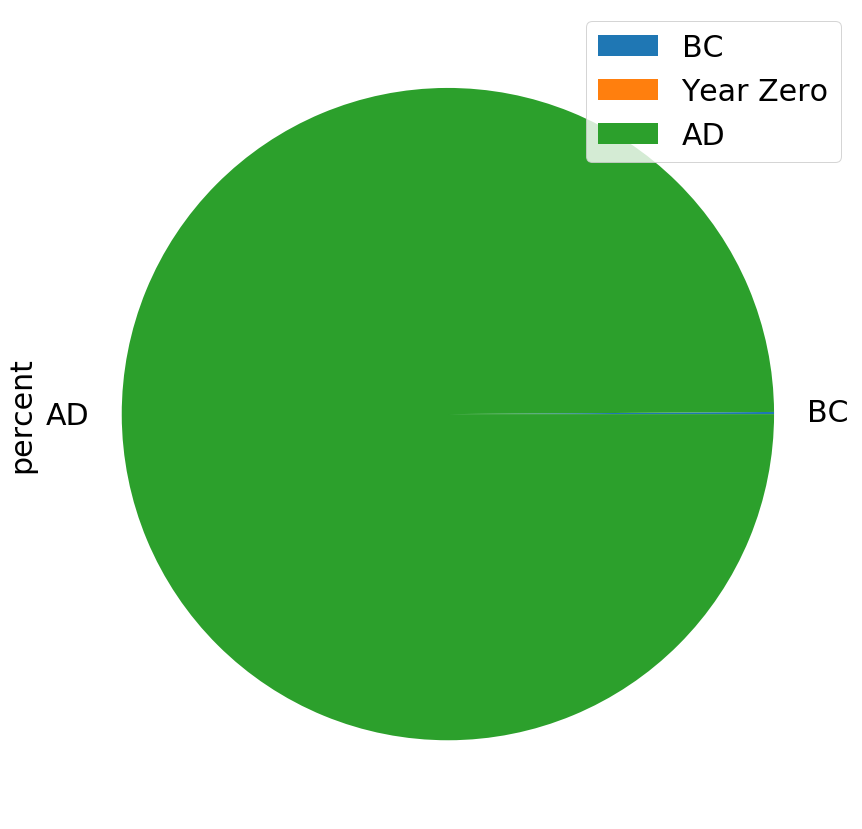

In [140]:
china_year_inspection_pd["percent"] = china
china_year_inspection_pd.plot.pie(y="percent")

In [141]:
import doctest
doctest.testmod(verbose=True)

Trying:
    year = [-20000,-8500,-5600,-3000,-1500]
Expecting nothing
ok
Trying:
    bc = categorize_bc_years(year)
Expecting nothing
ok
Trying:
    bc['before 10000BC']
Expecting:
    1
ok
Trying:
    year = [1911,1904,2020,2001,1921,1975,1801,1830]
Expecting nothing
ok
Trying:
    category = categorize_year_half_century(year)
Expecting nothing
ok
Trying:
    category["2000-2050"]
Expecting:
    2
ok
Trying:
    year = [1911,1904,2020,2001,1921,1975,1801]
Expecting nothing
ok
Trying:
    quarter_year = categorize_year_quarter_century(year)
Expecting nothing
ok
Trying:
    quarter_year["1800-1825"]
Expecting:
    1
ok
Trying:
    dictionary_year = {"0-500":3,"1000-1500":24,"500-1000": 90}
Expecting nothing
ok
Trying:
    key_in_order = ["0-500","500-1000","1000-1500"]
Expecting nothing
ok
Trying:
    correct_dictionary = change_key_order (key_in_order,dictionary_year)
Expecting nothing
ok
Trying:
    correct_dictionary
Expecting:
    {'0-500': 3, '500-1000': 90, '1000-1500': 24}
ok
Try

TestResults(failed=0, attempted=20)